# 1.Import libraries

In [1]:
import google.auth
from google.cloud import bigquery
from google.cloud import bigquery_storage


In [61]:
import numpy as np 
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# 2.Load data
 

In [3]:
# make clients
credentials, your_project_id = google.auth.default()

bqclient = bigquery.Client(credentials=credentials, project=your_project_id,)
bqstorageclient = bigquery_storage.BigQueryReadClient(credentials=credentials)


# define  query
query_sales = "SELECT * FROM `bigquery-public-data.iowa_liquor_sales.sales` "


In [4]:
# getting data
# i've also added the tqdm progress bar for seeing progress

df = (
    bqclient.query(query_sales)
            .result()
            .to_dataframe(
                bqstorage_client=bqstorageclient,
                progress_bar_type='tqdm_notebook',)
)

# 3.Overview: basic understanding of our dataset

In [5]:
df.head()

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,...,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
0,INV-00144300018,2016-09-06,4068,Sa Petro Mart,136 1ST ST,West Des Moines,50265,POINT (-93.703344 41.570743),77,POLK,...,88183,Olmeca Altos Plata Mini DISCO,12,500,6.6,9.90,2,19.8,1.0,0.26
1,INV-02109800021,2016-12-13,4377,Quik Trip #562 / NE 14th / DSM,4801 NE 14th St,Des Moines,50313,POINT (-93.600266 41.648602),77,POLK,...,89191,Jose Cuervo Especial Reposado Tequila Mini,12,500,11.5,17.25,2,34.5,1.0,0.26
2,INV-15109100105,2018-10-17,2603,Hy-Vee Wine and Spirits / Bettendorf,2890 Devils Glen Road,Bettendorf,52722,POINT (-90.483701 41.552338),82,SCOTT,...,89193,Jose Cuervo Especial Reposado,48,200,3.0,4.50,5,22.5,1.0,0.26
3,INV-01946000054,2016-12-05,4892,Sara Mini Mart,1026 W River Dr,Davenport,52802,POINT (-90.588375 41.520158),82,SCOTT,...,89193,Jose Cuervo Especial Reposado Tequila,48,200,3.0,4.50,5,22.5,1.0,0.26
4,INV-15675100017,2018-11-13,4384,Kum & Go #2093 / Adel,409 Nile Kinnick Dr,Adel,50003,POINT (-94.017511 41.614114),25,DALLAS,...,89191,Jose Cuervo Especial Reposado Mini,12,500,11.5,17.25,2,34.5,1.0,0.26


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19666763 entries, 0 to 19666762
Data columns (total 24 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   invoice_and_item_number  object 
 1   date                     object 
 2   store_number             object 
 3   store_name               object 
 4   address                  object 
 5   city                     object 
 6   zip_code                 object 
 7   store_location           object 
 8   county_number            object 
 9   county                   object 
 10  category                 object 
 11  category_name            object 
 12  vendor_number            object 
 13  vendor_name              object 
 14  item_number              object 
 15  item_description         object 
 16  pack                     int64  
 17  bottle_volume_ml         int64  
 18  state_bottle_cost        float64
 19  state_bottle_retail      float64
 20  bottles_sold             int64  
 21  sale_d

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
pack,19666763.0,12.276847,7.665563,1.0,6.00,12.00,12.00,336.00
bottle_volume_ml,19666763.0,911.595227,664.530001,0.0,750.00,750.00,1000.00,378000.00
state_bottle_cost,19666753.0,9.933429,10.747194,0.0,5.50,8.20,12.05,7680.00
state_bottle_retail,19666753.0,14.914822,16.120633,0.0,8.25,12.37,18.08,11520.00
bottles_sold,19666763.0,10.314832,27.805672,0.0,3.00,6.00,12.00,15000.00
sale_dollars,19666753.0,134.857842,464.388591,0.0,31.50,71.52,139.32,279557.28
volume_sold_liters,19666763.0,9.129828,33.575605,0.0,1.50,5.00,10.50,15000.00
volume_sold_gallons,19666763.0,2.410494,8.869791,0.0,0.40,1.32,2.77,3962.58


# 4.Data cleaning

In [8]:
# Displaying unique names of city

print(df['city'].nunique())
print(df['city'].str.upper().nunique())


836
456


In [9]:
# Displaying unique names of category

print(df['category_name'].nunique())
print(df['category'].nunique())
print(df['category_name'].str.upper().nunique())

133
110
110


In [10]:
# Making city,category_name and county to upper case

df['city'] = df['city'].str.upper()
df['category_name'] = df['category_name'].str.upper()
df['county'] = df['county'].str.upper()

In [11]:
# Checking for the Null values
df.isna().sum()

invoice_and_item_number          0
date                             0
store_number                     0
store_name                       0
address                      79927
city                         79926
zip_code                     79971
store_location             1886023
county_number               156731
county                      156729
category                     16974
category_name                25040
vendor_number                    5
vendor_name                      3
item_number                      0
item_description                 0
pack                             0
bottle_volume_ml                 0
state_bottle_cost               10
state_bottle_retail             10
bottles_sold                     0
sale_dollars                    10
volume_sold_liters               0
volume_sold_gallons              0
dtype: int64

In [12]:
def my_fillna( data,key, value):    
    subdata = data[[value,key]][data[key].isin(data[key][pd.isna(data[value])].unique())].dropna()
    dictionary = subdata.set_index(key).to_dict()[value]
    data[value] = data[value].fillna(data[key].apply(lambda x: dictionary.get(x)))
    return data[value]

In [13]:
df['city']=my_fillna(df,'store_number','city')
df['zip_code']= my_fillna(df,'store_number','zip_code')
df['address']= my_fillna(df,'store_number','address')
df['county_number']= my_fillna(df,'store_number','county_number')
df['county']= my_fillna(df,'store_number','county')
df['store_number']= my_fillna(df,'store_location','store_number')
df['county']= my_fillna(df,'store_number','county')

In [14]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

In [15]:
df['category_name']= my_fillna(df,'category','category_name')
df['vendor_number']= my_fillna(df,'vendor_name','vendor_number')
df['vendor_name']= my_fillna(df,'vendor_number','vendor_name')

In [16]:
df[['category','category_name']][df.category.isin(df.category[pd.isna(df.category_name)])] \
.drop_duplicates().sort_values(by=['category'])

,category,category_name
8750610,101220,None
217004,1062250,None
4793544,1089290,None
42213,None,None


In [17]:
df[pd.isna(df.state_bottle_cost)]

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,...,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons,year,month,day
2706282,S03839800115,2012-01-31,2593,Hy-Vee Food Store / Carroll,905 US HIGHWAY 30 WEST,CARROLL,51401,POINT (-94.853591 42.064155),14,CARROLL,...,500,NaN,NaN,2,NaN,1.0,0.26,2012,1,31
3839290,S03831800099,2012-01-31,2629,Hy-Vee Food Store #2 / Council Bluff,1745 MADISON AVE,COUNCIL BLUFFS,51503,POINT (-95.825137 41.242732),78,POTTAWATTAMIE,...,600,NaN,NaN,3,NaN,1.8,0.48,2012,1,31
7978960,S03816000008,2012-01-30,3583,Mac's Liquor And Videos,220 EAST JEFFERSON,CORYDON,50060,POINT (-93.315977 40.757158),93,WAYNE,...,600,NaN,NaN,1,NaN,0.6,0.16,2012,1,30
9287924,S03816800149,2012-01-30,2190,"Central City Liquor, Inc.",1460 2ND AVE,DES MOINES,50314,POINT (-93.619787 41.60566),77,POLK,...,600,NaN,NaN,1,NaN,0.6,0.16,2012,1,30
10180310,S03842900093,2012-01-31,2614,Hy-Vee #3 Food and Drugstore,1823 E KIMBERLY RD,DAVENPORT,52807,POINT (-90.548919 41.55678100000001),82,SCOTT,...,500,NaN,NaN,1,NaN,0.5,0.13,2012,1,31
11241903,S03842900089,2012-01-31,2614,Hy-Vee #3 Food and Drugstore,1823 E KIMBERLY RD,DAVENPORT,52807,POINT (-90.548919 41.55678100000001),82,SCOTT,...,600,NaN,NaN,2,NaN,1.2,0.32,2012,1,31
11995712,S03814000102,2012-01-30,2623,Hy-Vee Food Store #4 / Sioux City,2827 HAMILTON BLVD,SIOUX CITY,51104,POINT (-96.417783 42.519886),97,WOODBURY,...,600,NaN,NaN,2,NaN,1.2,0.32,2012,1,30
15366549,S03825400160,2012-01-31,2616,Hy-Vee Food and Drug / Clinton,901 SOUTH 4TH ST,CLINTON,52732,POINT (-90.193204 41.836268000000004),23,CLINTON,...,600,NaN,NaN,3,NaN,1.8,0.48,2012,1,31
15574367,S03818000080,2012-01-31,4509,A J'S LIQUOR II,2515 CHAMBERLAIN,AMES,50010,POINT (-93.650838 42.021461),85,STORY,...,600,NaN,NaN,1,NaN,0.6,0.16,2012,1,31
15903002,S03841000063,2012-01-31,2549,Hy-Vee Food Store / Indianola,910 N JEFFERSON,INDIANOLA,50125,None,91,WARREN,...,500,NaN,NaN,1,NaN,0.5,0.13,2012,1,31


In [18]:
df.state_bottle_cost[df.item_number=='38180'].unique()

array([12.8 , 10.03,   nan])

In [19]:
df.year[pd.isna(df.state_bottle_cost)].unique()

array([2012], dtype=int64)

In [20]:
df[['item_number','year','state_bottle_cost']][df.item_number.isin(df.item_number[pd.isna(df.state_bottle_cost)])] \
.drop_duplicates().sort_values(by=['item_number','year'])

,item_number,year,state_bottle_cost
1736718,35920,2012,5.00
2706282,35920,2012,NaN
1736724,35920,2013,5.00
334186,38180,2012,10.03
3839290,38180,2012,NaN
163485,38180,2014,12.80
7707,38180,2015,12.80
100722,38180,2016,12.80
318402,38180,2017,12.80
316306,38180,2018,12.80


In [21]:
df[['item_number','year','state_bottle_retail']][df.item_number.isin(
    (df.item_number[pd.isna(df.state_bottle_retail)]))] \
.drop_duplicates().sort_values(by=['item_number','year'])

,item_number,year,state_bottle_retail
1736718,35920,2012,7.50
2706282,35920,2012,NaN
1736724,35920,2013,7.50
334186,38180,2012,15.05
3839290,38180,2012,NaN
163485,38180,2014,19.20
7707,38180,2015,19.20
100722,38180,2016,19.20
318402,38180,2017,19.20
316306,38180,2018,19.20


In [22]:
df['state_bottle_cost'][df.year ==2012] = my_fillna(df[df.year ==2012],'item_number','state_bottle_cost')
df['state_bottle_retail'][df.year ==2012]= my_fillna(df[df.year ==2012],'item_number','state_bottle_retail')

In [23]:
# Checking for the Null values
df.isna().sum()

invoice_and_item_number          0
date                             0
store_number                     0
store_name                       0
address                        848
city                           847
zip_code                       847
store_location             1886023
county_number                 1646
county                        1644
category                     16974
category_name                16994
vendor_number                    5
vendor_name                      3
item_number                      0
item_description                 0
pack                             0
bottle_volume_ml                 0
state_bottle_cost                0
state_bottle_retail              0
bottles_sold                     0
sale_dollars                    10
volume_sold_liters               0
volume_sold_gallons              0
year                             0
month                            0
day                              0
dtype: int64

In [24]:
df.store_number[pd.isna(df.city)].unique()

array(['5320'], dtype=object)

In [25]:
df.city[df.store_number=='5320'].unique()

array([None], dtype=object)

In [26]:
df[pd.isna(df.sale_dollars)]

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,...,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons,year,month,day
2706282,S03839800115,2012-01-31,2593,Hy-Vee Food Store / Carroll,905 US HIGHWAY 30 WEST,CARROLL,51401,POINT (-94.853591 42.064155),14,CARROLL,...,500,5.00,7.50,2,NaN,1.0,0.26,2012,1,31
3839290,S03831800099,2012-01-31,2629,Hy-Vee Food Store #2 / Council Bluff,1745 MADISON AVE,COUNCIL BLUFFS,51503,POINT (-95.825137 41.242732),78,POTTAWATTAMIE,...,600,10.03,15.05,3,NaN,1.8,0.48,2012,1,31
7978960,S03816000008,2012-01-30,3583,Mac's Liquor And Videos,220 EAST JEFFERSON,CORYDON,50060,POINT (-93.315977 40.757158),93,WAYNE,...,600,10.03,15.05,1,NaN,0.6,0.16,2012,1,30
9287924,S03816800149,2012-01-30,2190,"Central City Liquor, Inc.",1460 2ND AVE,DES MOINES,50314,POINT (-93.619787 41.60566),77,POLK,...,600,10.03,15.05,1,NaN,0.6,0.16,2012,1,30
10180310,S03842900093,2012-01-31,2614,Hy-Vee #3 Food and Drugstore,1823 E KIMBERLY RD,DAVENPORT,52807,POINT (-90.548919 41.55678100000001),82,SCOTT,...,500,5.00,7.50,1,NaN,0.5,0.13,2012,1,31
11241903,S03842900089,2012-01-31,2614,Hy-Vee #3 Food and Drugstore,1823 E KIMBERLY RD,DAVENPORT,52807,POINT (-90.548919 41.55678100000001),82,SCOTT,...,600,10.03,15.05,2,NaN,1.2,0.32,2012,1,31
11995712,S03814000102,2012-01-30,2623,Hy-Vee Food Store #4 / Sioux City,2827 HAMILTON BLVD,SIOUX CITY,51104,POINT (-96.417783 42.519886),97,WOODBURY,...,600,10.03,15.05,2,NaN,1.2,0.32,2012,1,30
15366549,S03825400160,2012-01-31,2616,Hy-Vee Food and Drug / Clinton,901 SOUTH 4TH ST,CLINTON,52732,POINT (-90.193204 41.836268000000004),23,CLINTON,...,600,10.03,15.05,3,NaN,1.8,0.48,2012,1,31
15574367,S03818000080,2012-01-31,4509,A J'S LIQUOR II,2515 CHAMBERLAIN,AMES,50010,POINT (-93.650838 42.021461),85,STORY,...,600,10.03,15.05,1,NaN,0.6,0.16,2012,1,31
15903002,S03841000063,2012-01-31,2549,Hy-Vee Food Store / Indianola,910 N JEFFERSON,INDIANOLA,50125,None,91,WARREN,...,500,5.00,7.50,1,NaN,0.5,0.13,2012,1,31


In [27]:
df.sale_dollars = df.sale_dollars.fillna(df.state_bottle_retail*df.bottles_sold)

In [28]:
df.city = df.city.fillna('NOT_FOUND')

In [29]:
# Checking for the Null values
df.isna().sum()

invoice_and_item_number          0
date                             0
store_number                     0
store_name                       0
address                        848
city                             0
zip_code                       847
store_location             1886023
county_number                 1646
county                        1644
category                     16974
category_name                16994
vendor_number                    5
vendor_name                      3
item_number                      0
item_description                 0
pack                             0
bottle_volume_ml                 0
state_bottle_cost                0
state_bottle_retail              0
bottles_sold                     0
sale_dollars                     0
volume_sold_liters               0
volume_sold_gallons              0
year                             0
month                            0
day                              0
dtype: int64

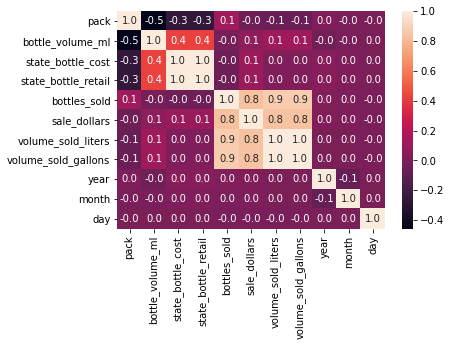

In [30]:
sns.heatmap(df.corr(), annot=True, fmt=".1f")
# expected result

In [31]:
df.groupby(['item_description'],as_index=False) \
        .agg({'volume_sold_liters':'sum' ,'volume_sold_gallons':'sum' ,  'sale_dollars':'sum'}) \
        .sort_values(['volume_sold_liters', 'sale_dollars' ], ascending=False) \
        .astype({'sale_dollars': 'int','volume_sold_liters': 'int','volume_sold_gallons': 'int'})

# top products during all time with starnge last position

,item_description,volume_sold_liters,volume_sold_gallons,sale_dollars
1048,Black Velvet,11551002,3050944,107218466
4008,Hawkeye Vodka,7809411,2062599,49496720
1685,Captain Morgan Spiced Rum,4356605,1150701,73458084
8139,Titos Handmade Vodka,3955936,1044513,70603190
3148,Fireball Cinnamon Whiskey,3601269,951020,58175005
...,...,...,...,...
6203,Pearl Peach Mini,0,0,79
8455,Westerhall Plantation Rum,0,0,303
1495,Butter Pecan Sippin'' Cream 50ml,0,0,119
7660,Stoli Crushed Pineapple Mini,0,0,88


In [32]:
df.drop('volume_sold_gallons', inplace=True, axis=1)

In [33]:
df.item_description[(df.volume_sold_liters==0) & (df.sale_dollars!=0)].unique()

array(["Burnett's Pink Lemonade Vodka Mini", 'Rondiaz DSS Lemon Rum',
       'Three Olives Orange Vodka', 'Canadian Club Dock 57 Mini DNO'],
      dtype=object)

In [34]:
df0 = df[['item_description','state_bottle_retail','year','bottle_volume_ml','month']] \
[df.state_bottle_retail==0].drop_duplicates().sort_values('item_description', ascending=False)

In [35]:
df1 = df[['item_description','state_bottle_retail','year','bottle_volume_ml','month']] \
[df.item_description.isin(df.item_description[df.state_bottle_retail==0].unique())] \
.drop_duplicates().sort_values('item_description', ascending=False)

In [36]:
df0 \
    .merge(df1, on=['item_description','year','bottle_volume_ml']) \
    .query("state_bottle_retail_y!=0") \
    .drop_duplicates()

# can't fix all strange  data for last positions on top products board
# can't find right price 

,item_description,state_bottle_retail_x,year,bottle_volume_ml,month_x,state_bottle_retail_y,month_y
0,Yahara Bay Aged Rum,0.0,2012,375,9,16.53,11
3,Yahara Bay Aged Rum,0.0,2012,375,4,16.53,11
6,Thunder 101 Peppermint Schnapps,0.0,2012,750,2,9.64,1
7,Thunder 101 Peppermint Schnapps,0.0,2012,750,2,9.64,4
8,Thunder 101 Peppermint Schnapps,0.0,2012,750,2,9.75,11
...,...,...,...,...,...,...,...
356,Hangar One Kaffir Lime Vodka,0.0,2013,750,4,27.00,12
357,Hangar One Kaffir Lime Vodka,0.0,2013,750,4,27.00,10
358,Hangar One Kaffir Lime Vodka,0.0,2013,750,4,22.47,3
360,Hangar One Kaffir Lime Vodka,0.0,2013,750,4,27.00,8


In [37]:
df[(df.volume_sold_liters!=0) & (df.sale_dollars==0)]
# But we can fix 'sale_dollars' where sale_dollars and state_bottle_retail not 0

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,...,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,year,month,day
9659,INV-07251200001,2017-09-14,4984,Fast Ave One Stop,2111 Park Ave,MUSCATINE,52761,POINT (-91.030306 41.447149),70,MUSCATINE,...,12,750,11.07,16.61,1,0.0,0.75,2017,9,14
25489,INV-00762700001,2016-10-04,5113,"Ray's Supermarket, Inc.",1975 Franklin St,WATERLOO,50703,POINT (-92.315215 42.495394),7,BLACK HAWK,...,12,750,6.83,10.25,2,0.0,1.50,2016,10,4
30058,INV-00406400001,2016-09-16,4415,KUM & GO #513 / ACKLEY,420 Sherman St,ACKLEY,50601,POINT (-93.056656 42.556727),42,HARDIN,...,48,200,3.00,4.50,4,0.0,0.80,2016,9,16
30071,INV-03736400001,2017-03-09,4877,World Liquor & Tobacco,1775 NW 86th St,CLIVE,50325,POINT (-93.736232 41.607853),77,POLK,...,12,375,5.50,8.25,1,0.0,0.37,2017,3,9
44084,S04155700016,2012-02-20,2597,Hy-Vee Food Store / Cherokee,1300 N. SECOND,CHEROKEE,51012,POINT (-95.552585 42.765259),18,CHEROKEE,...,12,750,0.00,0.00,12,0.0,9.00,2012,2,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19648389,INV-00893700001,2016-10-07,4786,Casey's General Store #1706 / Winterset,1021 N 1st St,WINTERSET,50273,POINT (-94.013479 41.34362600000001),61,MADISON,...,12,750,5.78,8.67,3,0.0,2.25,2016,10,7
19651042,S03967000034,2012-02-07,2448,Bottle Boutique,705 E. SECOND,INDIANOLA,50125,POINT (-93.55261600000001 41.358176),91,WARREN,...,12,1000,0.00,0.00,1,0.0,1.00,2012,2,7
19651490,INV-01220000001,2016-10-27,2582,Hy-Vee #2 Food Store / Mason City,551 S Illinois Ave,MASON CITY,50401,POINT (-93.17114 43.14623),17,CERRO GORD,...,6,1750,20.17,30.26,5,0.0,8.75,2016,10,27
19657552,S04141600015,2012-02-20,4502,Neighborhood Mart / Waterloo,"2100, LAFAYETTE ST",WATERLOO,50703,POINT (-92.31397200000002 42.489914),07,BLACK HAWK,...,12,1000,0.00,0.00,2,0.0,2.00,2012,2,20


In [38]:
df[ (df.sale_dollars==0) & (df.state_bottle_retail!=0)]


,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,...,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,year,month,day
9659,INV-07251200001,2017-09-14,4984,Fast Ave One Stop,2111 Park Ave,MUSCATINE,52761,POINT (-91.030306 41.447149),70,MUSCATINE,...,12,750,11.07,16.61,1,0.0,0.75,2017,9,14
25489,INV-00762700001,2016-10-04,5113,"Ray's Supermarket, Inc.",1975 Franklin St,WATERLOO,50703,POINT (-92.315215 42.495394),7,BLACK HAWK,...,12,750,6.83,10.25,2,0.0,1.50,2016,10,4
30058,INV-00406400001,2016-09-16,4415,KUM & GO #513 / ACKLEY,420 Sherman St,ACKLEY,50601,POINT (-93.056656 42.556727),42,HARDIN,...,48,200,3.00,4.50,4,0.0,0.80,2016,9,16
30071,INV-03736400001,2017-03-09,4877,World Liquor & Tobacco,1775 NW 86th St,CLIVE,50325,POINT (-93.736232 41.607853),77,POLK,...,12,375,5.50,8.25,1,0.0,0.37,2017,3,9
51360,INV-00763100001,2016-10-10,2538,Hy-Vee Food Store #3 / Waterloo,1422 Flammang Dr,WATERLOO,50702,POINT (-92.327917 42.459938),7,BLACK HAWK,...,6,750,20.99,31.49,1,0.0,0.75,2016,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19618255,INV-06760900001,2017-08-18,5279,Casey's General Store # 2560/ Ames,3020 Duff Ave,AMES,50010,POINT (-93.618576 42.05119),85,STORY,...,6,1750,11.55,17.33,3,0.0,5.25,2017,8,18
19624934,INV-08887800001,2017-11-29,2565,Hy-Vee Food Store / Spencer,819 N Grand Ave,SPENCER,51301,POINT (-95.14506 43.145897),21,CLAY,...,12,750,7.49,11.24,1,0.0,0.75,2017,11,29
19624935,INV-01009100001,2016-10-18,4103,Fareway Stores #093 / Ames,3619 Stange Rd,AMES,50010,POINT (-93.645008 42.057108),85,STORY,...,6,750,9.00,13.50,1,0.0,0.75,2016,10,18
19648389,INV-00893700001,2016-10-07,4786,Casey's General Store #1706 / Winterset,1021 N 1st St,WINTERSET,50273,POINT (-94.013479 41.34362600000001),61,MADISON,...,12,750,5.78,8.67,3,0.0,2.25,2016,10,7


In [39]:
df.sale_dollars[ (df.sale_dollars==0) & (df.state_bottle_retail!=0) & \
                (df.bottles_sold!=0)] = df.state_bottle_retail*df.bottles_sold


In [40]:
df[['item_description','bottle_volume_ml']][df.item_description.isin(df.item_description[(df.bottle_volume_ml==0) 
                                    & (df.sale_dollars!=0)].unique())].drop_duplicates()

,item_description,bottle_volume_ml
593605,Burnett's Pink Lemonade Vodka Mini,0
1680921,Rondiaz DSS Lemon Rum,0
1734814,Three Olives Orange Vodka,750
3250878,Three Olives Orange Vodka,0
3664532,Rondiaz DSS Lemon Rum,1000
4173941,Burnett's Pink Lemonade Vodka Mini,500
18489305,Canadian Club Dock 57 Mini DNO,0


In [41]:
df = df.drop(df[df.item_description=="Canadian Club Dock 57 Mini DNO"].index)

In [42]:
df.volume_sold_liters[df.volume_sold_liters==0]=df.bottle_volume_ml*df.bottles_sold/1000

In [43]:
df.bottle_volume_ml[(df.item_description=="Burnett's Pink Lemonade Vodka Mini")  &(df.bottle_volume_ml==0) ]=500
df.bottle_volume_ml[(df.item_description=="Three Olives Orange Vodka")  &(df.bottle_volume_ml==0) ]=750
df.bottle_volume_ml[(df.item_description=="Rondiaz DSS Lemon Rum")  &(df.bottle_volume_ml==0) ]=1000

# 5.Basic information from data

In [71]:
df.groupby(['year','item_description'],as_index=False) \
        .agg({'volume_sold_liters':'sum' , 'sale_dollars':'sum'}) \
        .sort_values(['year','volume_sold_liters', 'sale_dollars' ], ascending=False) \
        .astype({'sale_dollars': 'int'})

# top products per year

,year,item_description,volume_sold_liters,sale_dollars
24176,2020,Black Velvet,1066857.26,10048749
26806,2020,Titos Handmade Vodka,971429.76,17462877
25233,2020,Hawkeye Vodka,551366.41,3509791
24967,2020,Fireball Cinnamon Whiskey,458483.30,7013788
24400,2020,Captain Morgan Original Spiced,446772.93,7631709
...,...,...,...,...
835,2012,English Harbour Rum 10yr,0.75,69
1027,2012,Grappa Moscato 50ml,0.60,91
1251,2012,Johnnie Walker Black Minis,0.50,305
1022,2012,Grappa Di Recioto Amarone50ml,0.30,49


In [72]:
df.groupby(['year','item_description'],as_index=False) \
    .agg({'volume_sold_liters':'sum' , 'sale_dollars':'sum'}) \
    .sort_values(['volume_sold_liters', 'sale_dollars' ], ascending=[False,False]) \
    .astype({'sale_dollars': 'int'}) \
    .groupby('year') \
    .head(1)
# The most popular item every year is Black Velvet

,year,item_description,volume_sold_liters,sale_dollars
13961,2017,Black Velvet,1417999.73,13258528
17164,2018,Black Velvet,1387828.19,13079728
20707,2019,Black Velvet,1379947.87,13014788
10787,2016,Black Velvet,1343055.14,12378704
8007,2015,Black Velvet,1317274.82,12113647
5240,2014,Black Velvet,1273286.95,11697936
2645,2013,Black Velvet,1211655.35,11096984
276,2012,Black Velvet,1153097.53,10530164
24176,2020,Black Velvet,1066857.26,10048749


In [73]:
df_problem_product = df.groupby(['year','item_description'],as_index=False) \
    .agg({'volume_sold_liters':'sum' , 'sale_dollars':'sum'}) \
    .sort_values(['volume_sold_liters', 'sale_dollars' ], ascending=[True,True]) \
    .astype({'sale_dollars': 'int'}) \
    .groupby('year') \
    .head(1)

df_problem_product


,year,item_description,volume_sold_liters,sale_dollars
5341,2014,Burnett's Pink Lemonade Vodka Mini,0.00,76
8117,2015,Burnett's Pink Lemonade Vodka Mini,0.00,153
4345,2013,Rondiaz DSS Lemon Rum,0.00,383
16368,2017,Stoli Variety Mini Bar,0.05,5
25872,2020,New Amsterdam Orange Mini,0.05,8
2273,2012,Westerhall Plantation Rum,0.07,303
22690,2019,Ocean Organic Vodka Mini,0.10,90
18072,2018,Figenza Mediterranean Fig Vodka Mini,0.20,101
11778,2016,Grappa Di Recioto Amarone50ml,0.30,52


In [74]:
df[df.item_description.isin(df_problem_product.item_description)] \
        .groupby(['year','item_description'],as_index=False) \
        .agg({'volume_sold_liters':'sum','sale_dollars':'sum'}) \
        .sort_values(['item_description','year'], ascending=[True,True]) \
        .astype({'sale_dollars': 'int'})

# New Amsterdam Orange Mini doesn't bring money in 2020, I think stop transporting is a good idea

,year,item_description,volume_sold_liters,sale_dollars
3,2014,Burnett's Pink Lemonade Vodka Mini,0.00,76
6,2015,Burnett's Pink Lemonade Vodka Mini,0.00,153
9,2016,Burnett's Pink Lemonade Vodka Mini,6.00,76
12,2017,Burnett's Pink Lemonade Vodka Mini,18.00,229
16,2018,Burnett's Pink Lemonade Vodka Mini,6.00,76
17,2018,Figenza Mediterranean Fig Vodka Mini,0.20,101
19,2019,Figenza Mediterranean Fig Vodka Mini,1.00,505
0,2012,Grappa Di Recioto Amarone50ml,0.30,49
4,2014,Grappa Di Recioto Amarone50ml,0.30,49
7,2015,Grappa Di Recioto Amarone50ml,0.30,52


In [75]:
df.groupby(['city','item_description'],as_index=False) \
    .agg({'volume_sold_liters':'sum' , 'sale_dollars':'sum'}) \
    .sort_values(['volume_sold_liters', 'sale_dollars' ], ascending=[False,False]) \
    .astype({'sale_dollars': 'int'}) \
    .groupby('city') \
    .head(1)

# "COLORADO SPRINGS" not a city of alcohol lovers if the most pupular item bring only 15$

,city,item_description,volume_sold_liters,sale_dollars
120610,DES MOINES,Fireball Cinnamon Whiskey,723445.03,11145639
62548,CEDAR RAPIDS,Black Velvet,648603.86,6044404
379657,WATERLOO,Black Velvet,356699.45,3363903
342443,SIOUX CITY,Black Velvet,310787.27,2965754
197620,IOWA CITY,Hawkeye Vodka,298897.24,1900928
...,...,...,...,...
413935,WYOMING,Black Velvet,93.00,974
270366,MURRAY,Black Velvet,92.87,896
10645,ALVORD,Captain Morgan Spiced Rum,22.50,350
6379,ALLERTON,Blantons Bourbon,18.00,1035


In [76]:
df_plot = df.groupby(['category_name'],as_index=False) \
    .agg({'sale_dollars':'sum', 'volume_sold_liters':'sum'})  \
    .sort_values('sale_dollars', ascending =False) \
    .astype({'sale_dollars': 'int'})

In [77]:
fig_reg = px.bar(df_plot.head(10),x='category_name', y='volume_sold_liters',color='volume_sold_liters')
fig_reg.update_layout(
    title="Volume of sold liquor per category",
    xaxis_title=" Category Name",
    yaxis_title="Volume in liters",
    )

fig_reg2 = px.bar(df_plot.head(10),x='category_name', y='sale_dollars',color='volume_sold_liters')
fig_reg2.update_layout(
    title="Sales of liquor per category",
    xaxis_title="Category Name",
    yaxis_title="Sales in dollars",
    )


fig_reg.show()
fig_reg2.show()

# Let's look at graphic of most income-generating category of alcohol and their volume
# Here we can see that vodka is 3d on volume and 5th on income

In [78]:
df.groupby(['city','item_description'],as_index=False) \
    .agg({'sale_dollars':'sum', 'volume_sold_liters':'sum', 'bottles_sold':'sum', 'state_bottle_retail':'mean'}) \
    .sort_values(['sale_dollars'], ascending =False) \
    .astype({'sale_dollars': 'int'}) \
    .groupby('city') \
    .head(1)

# favorite items 

,city,item_description,sale_dollars,volume_sold_liters,bottles_sold,state_bottle_retail
120610,DES MOINES,Fireball Cinnamon Whiskey,11145639,723445.03,1002508,13.334032
62548,CEDAR RAPIDS,Black Velvet,6044404,648603.86,603380,8.732476
381277,WATERLOO,Hennessy VS,4151918,99402.54,331500,15.123313
402860,WEST DES MOINES,Titos Handmade Vodka,4020999,231464.47,201233,18.345245
108822,DAVENPORT,Hennessy VS,3862551,92008.11,282549,15.166241
...,...,...,...,...,...,...
6490,ALLERTON,SOOH Michters 10YR Old Single Barrel,1498,13.50,18,83.250000
413940,WYOMING,Captain Morgan Original Spiced,992,58.50,66,19.280000
270366,MURRAY,Black Velvet,896,92.87,94,9.758947
10645,ALVORD,Captain Morgan Spiced Rum,350,22.50,18,20.985000


In [79]:
df[df.city=='DES MOINES'].groupby(['year','item_description'],as_index=False) \
    .agg({'sale_dollars':'sum', 'volume_sold_liters':'sum', 'bottles_sold':'sum', 'state_bottle_retail':'mean'}) \
    .sort_values(['sale_dollars'], ascending =False) \
    .astype({'sale_dollars': 'int'}) \
    .groupby('year') \
    .head(1)

# In 'DES MOINES' new favorite drink "Hennessy VS"

,year,item_description,sale_dollars,volume_sold_liters,bottles_sold,state_bottle_retail
17636,2019,Titos Handmade Vodka,2561407,136504.43,142394,15.922595
14989,2018,Titos Handmade Vodka,2188945,117639.91,119089,16.770853
18877,2020,Hennessy VS,1895048,44851.29,100637,22.357364
4453,2014,Fireball Cinnamon Whiskey,1647189,107405.16,94660,15.558951
12296,2017,Titos Handmade Vodka,1623511,90464.95,90560,18.120370
2484,2013,Fireball Cinnamon Whiskey,1454305,93186.53,87206,14.239603
6548,2015,Fireball Cinnamon Whiskey,1390053,91066.05,80713,15.919987
8712,2016,Fireball Cinnamon Whiskey,1289706,83207.95,79884,14.435145
341,2012,Captain Morgan Spiced Rum,1272212,76085.86,79653,15.971489


In [80]:
df_month = df.groupby(['month'],as_index=False) \
        .agg({'sale_dollars':'sum', 'volume_sold_liters':'sum', 'bottles_sold':'sum', 'state_bottle_retail':'mean'}) \
    .sort_values(['sale_dollars'], ascending =False) \
    .astype({'sale_dollars': 'int','volume_sold_liters': 'int'}) 

# The largest sales of alcohol are in 12 and 10 months
df_month

,month,sale_dollars,volume_sold_liters,bottles_sold,state_bottle_retail
11,12,247095718,15773595,18070865,15.455966
9,10,244474948,16239196,17936748,15.030111
5,6,242539947,16532965,18553982,14.891487
4,5,237076671,16617988,18336945,14.900896
7,8,231147158,15630704,17878815,14.860512
6,7,226325258,15587398,17602272,14.775675
8,9,223317709,14910230,16862743,14.994593
3,4,219500956,15195861,17055667,14.840674
2,3,208748600,14075649,16175419,14.791997
1,2,195897251,13706378,15090154,14.683722


In [81]:
dict_day = {0:"Monday",1:"Tuesday",2:"Wednesday",3:"Thursday",4:"Friday",5:"Saturday",6:"Sunday"}
df['week_day'] = df.date.dt.dayofweek.apply(lambda x: dict_day[x])

df.groupby(['week_day'] ,as_index=False) \
        .agg({'sale_dollars':'sum', 'volume_sold_liters':'sum', 'bottles_sold':'sum',  'state_bottle_retail':'mean'}) \
    .sort_values(['sale_dollars'], ascending =False) \
    .astype({'sale_dollars': 'int','volume_sold_liters': 'int'}) 

# There seems alcohol sell the most Monday - Thursday, and see sales fall Friday and Sunday.

,week_day,sale_dollars,volume_sold_liters,bottles_sold,state_bottle_retail
1,Monday,629057988,42303045,47881357,14.934526
6,Wednesday,612163616,41816216,46246701,15.021901
5,Tuesday,585429439,40394950,45427701,14.687506
4,Thursday,555379061,36772001,42090996,14.971556
0,Friday,252792027,17071532,19886451,15.052932
2,Saturday,17326659,1188338,1316771,14.924084
3,Sunday,124044,8087,9362,17.958589


In [82]:
df_year = df.groupby(['year'] ,as_index=False) \
    .agg({'sale_dollars':'sum', 'volume_sold_liters':'sum', 'bottles_sold':'sum',  'state_bottle_retail':'mean'}) \
    .sort_values(['volume_sold_liters'], ascending =False) \
    .astype({'sale_dollars': 'int','volume_sold_liters': 'int'})
df_year

,year,sale_dollars,volume_sold_liters,bottles_sold,state_bottle_retail
7,2019,349220341,22301422,26844339,15.518881
6,2018,334231075,21895982,25435040,15.288400
5,2017,314554185,21096850,23990017,15.144977
4,2016,299466020,20300264,22670318,15.010384
3,2015,284328572,19617702,21572443,14.742391
2,2014,270587651,19157612,20666247,14.445170
0,2012,255203539,18755279,19917404,13.785409
1,2013,258103792,18576450,19934692,14.113130
8,2020,286577658,17852609,21828839,16.108049


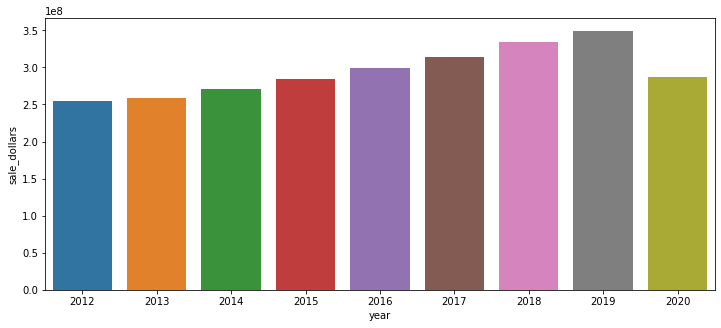

In [83]:
plt.figure(figsize=(12,5))
sns.barplot(x='year',y='sale_dollars',data=df_year)

#  We can see a trend of sales growth, but in 2020 quarantine changed the statistics

### So, this is basic information from the data, of course, we can choose a narrower direction and develop it, depending on the problem we seek to solve.